In [39]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = pd.read_csv('toyato.csv', na_values=['??', '????'])

In [6]:
data.head(3)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165


In [7]:
data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

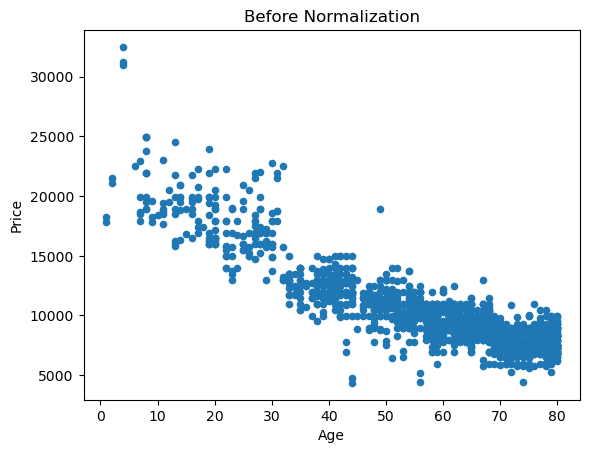

In [9]:
data.plot.scatter(x='Age', y='Price', title='Before Normalization');

Normalization can be done for any numeric columns present in the dataset

### Maximum Absolute Scaling

### $x_{new}$ = $\frac{x_{old}}{max(abs(x_{old}))}$

In [10]:
def max_abs_scaling(df):
    df_scaled = df.copy()
    for col in df.columns[:2]:
        df_scaled[col] = df_scaled[col] / df_scaled[col].abs().max()
    return df_scaled

In [11]:
max_abs_scaled_data = max_abs_scaling(data)
max_abs_scaled_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.415385,0.2875,46986,Diesel,90,1,0,2000,3,1165
1,0.423077,0.2875,72937,Diesel,90,1,0,2000,3,1165
2,0.429231,0.3000,41711,Diesel,90,1,0,2000,3,1165
3,0.460000,0.3250,48000,Diesel,90,0,0,2000,3,1165
4,0.423077,0.3750,38500,Diesel,90,0,0,2000,3,1170


In [18]:
# Using Sklearn
max_abs_scaler = MaxAbsScaler()

In [19]:
max_abs_scaler

MaxAbsScaler()

In [20]:
scale_data = data.iloc[:, :2]

In [31]:
max_abs_scaler.fit(scale_data)

MaxAbsScaler()

In [32]:
max_abs_scaler.max_abs_

array([32500.,    80.])

In [33]:
result = max_abs_scaler.transform(scale_data)

In [35]:
type(result), result.dtype, result.shape

(numpy.ndarray, dtype('float64'), (1436, 2))

In [36]:
scaled_result = pd.DataFrame(data=result, columns=['Price', 'Age'])
scaled_result.head()

,Price,Age
0,0.415385,0.2875
1,0.423077,0.2875
2,0.429231,0.3000
3,0.460000,0.3250
4,0.423077,0.3750


### Min-Max Normalization

### $ x^, = \frac{x - x_{min}}{x_{max} - x_{min}} $

In [45]:
def min_max_scaling(df):
    df_scaled = df.copy()
    for col in df.columns:
        df_scaled[col] = (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())
    return df_scaled

In [46]:
func_result = min_max_scaling(scale_data)
func_result.head()

,Price,Age
0,0.325044,0.278481
1,0.333925,0.278481
2,0.341030,0.291139
3,0.376554,0.316456
4,0.333925,0.367089


In [40]:
min_max_scaler = MinMaxScaler()

In [44]:
min_max_scaler.fit(scale_data)
min_max_scaler.data_max_, min_max_scaler.data_min_

(array([32500.,    80.]), array([4.35e+03, 1.00e+00]))

In [41]:
result1 = min_max_scaler.fit_transform(scale_data)

In [43]:
scaled_result1 = pd.DataFrame(data=result1, columns=['Price', 'Age'])
scaled_result1.head()

,Price,Age
0,0.325044,0.278481
1,0.333925,0.278481
2,0.341030,0.291139
3,0.376554,0.316456
4,0.333925,0.367089


In [47]:
func_result == scaled_result1

,Price,Age
0,False,True
1,True,True
2,False,True
3,True,False
4,True,False
...,...,...
1431,False,True
1432,True,True
1433,False,False
1434,False,True


### Z Normalization

z = x - mu / sigma

Mean with columns with many outliers will either increase the value of it which results to imbalance.

Robust Scaler